# 1. BankChurn - EDA

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, pearsonr, probplot, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/BankChurners.csv')
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)

# Recommended by dataset owner to drop these two cols, Im also dopping the client number
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 
        'CLIENTNUM'], axis = 1, inplace=True)
print(df['Attrition_Flag'].value_counts() / len(df['Attrition_Flag']), '\n')
df.info()

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit       

In [2]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [4]:
# Target variable
df['Attrition_Flag'].value_counts() / len(df['Attrition_Flag'])

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [5]:
# Categorical features 
print(df['Education_Level'].value_counts(), '\n')
print(df['Marital_Status'].value_counts(), '\n')
print(df['Income_Category'].value_counts(), '\n')
print(df['Card_Category'].value_counts(), '\n')

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 



In [6]:
# Categorical columns for encoding
cols = ['Education_Level', 'Marital_Status', 'Income_Category','Card_Category']

for col in cols:
    print(col+':', len(df[col].unique()))

Education_Level: 7
Marital_Status: 4
Income_Category: 6
Card_Category: 4


In [7]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df.head()

In [8]:
# Label encoding function
def label_encode(df, col):
    col_names = df[col].unique()
    vals = np.arange(0, len(df[col].unique()), 1)
    mapper = dict(zip(col_names, vals))
    df[col] = df[col].replace(mapper)
    return df[col]

In [9]:
for col in df[['Gender', 'Attrition_Flag', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category']]:
    label_encode(df, col)

In [10]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Clean dataset no missing values but dataset is moderatly imbalances with just over 8:2 ratio of target labels

Let's convert target column to numeric for downstream correlation and visualzation purposes 

# Investigating Univariate Statistics
* Fundamental data descriptions not covered in df.describe
* Variance, feature skew, and kurtosis
* Visualizing the results

In [11]:
# Instantiating emtpy describtion dataframe
describe_df = pd.DataFrame(columns = ['Columns', 'VAR', 'SKEW', 'KURT'])

cols = df.select_dtypes(['float', 'int']).columns
cols = cols[1:]
describe_df['Columns'] = cols

In [12]:
# df.var()
var = []
for col in df.select_dtypes(['float', 'int']):
    if col != 'Attrition_Flag':
        var.append(df.var()[col])

describe_df["VAR"] = var
describe_df['VAR'] = describe_df['VAR'].round(2)

In [13]:
# Inpecting skew 
# Pandas skew method set to sample by default

skew = []
for col in df.select_dtypes(['float', 'int']):
    if col != 'Attrition_Flag':
        skew.append(df.skew()[col])
        
describe_df["SKEW"] = skew

In [14]:
# Inpecting skew 
# Pandas skew method set to sample by default

kurt = []
for col in df.select_dtypes(['float', 'int']):
    if col != 'Attrition_Flag':
        kurt.append(df.kurt()[col])
        
describe_df["KURT"] = kurt

In [15]:
describe_df

,Columns,VAR,SKEW,KURT
0,Customer_Age,64.27,-0.033605,-0.288620
1,Gender,0.25,-0.116537,-1.986811
2,Dependent_count,1.69,-0.020826,-0.683017
3,Education_Level,2.82,0.735743,-0.353465
4,Marital_Status,0.77,1.139634,0.661861
5,Income_Category,2.36,0.582180,-0.731744
6,Card_Category,0.23,3.685754,12.124388
7,Months_on_book,63.78,-0.106565,0.400100
8,Total_Relationship_Count,2.42,-0.162452,-1.006131
9,Months_Inactive_12_mon,1.02,0.633061,1.098523


### Visualizing Skew and Kurtosis

 	 Many right skewed features with high denstiy of values clustered around the mode/peak


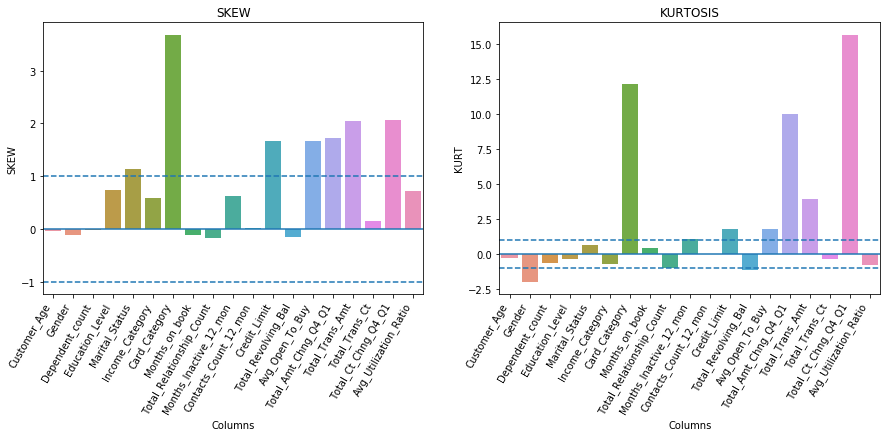

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))


sns.barplot(x=describe_df['Columns'], y=describe_df['SKEW'], ax=ax[0])
ax[0].set_title('SKEW')
ax[0].set_xticklabels(labels=describe_df['Columns'], rotation=60, ha='right', minor=False)
ax[0].axhline(1, ls='--')
ax[0].axhline(0, ls='-')
ax[0].axhline(-1, ls='--')


sns.barplot(x=describe_df['Columns'], y=describe_df['KURT'], ax=ax[1])
ax[1].set_title('KURTOSIS')
ax[1].set_xticklabels(labels=describe_df['Columns'], rotation=60, ha='right', minor=False)
ax[1].axhline(1, ls='--')
ax[1].axhline(0, ls='-')
ax[1].axhline(-1, ls='--')

print( "\033[1m" ,"\t Many right skewed features with high denstiy of values clustered around the mode/peak")
plt.show()

In [17]:
# Card Category is highly skewed - the 0 class represents 93% of the values
# Will exclude from plotting 
df['Card_Category'].value_counts(normalize=True)

0    0.931767
2    0.054804
1    0.011455
3    0.001975
Name: Card_Category, dtype: float64

# Outlier Investigation 
* Visualising univariate distributions in relation to the target classes
* Skewed outlier upper limits 
* Card category has been dropped as it is throwing a bandwitdth density error for the KDE function of distplot

In [18]:
# Skewed outlier upper limits 
limits = []
def skewed_outlier(df, col, distance):
    IRQ = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75) +  (IRQ*distance)
    return upper_limit

skewed_dist = list(describe_df[describe_df['SKEW'] > 1.5]['Columns'])[1:]
# Filtering and listing the skewed columns from describe_df - (minus Card_Category)
for col in skewed_dist:
    limits.append(skewed_outlier(df, col, 1.5))
    

In [19]:
limits

[23836.25, 22660.75, 1.2010000000000003, 8619.25, 1.1719999999999997]

In [20]:
# Visualising univariate distributions in relation to the target classes
customer = df[df['Attrition_Flag'] == 0]
churner = df[df['Attrition_Flag'] == 1]

def dist_plots(df1,df2, col):
    plt.figure(figsize=(14,10))
    
    plt.subplot(2,2,1,)
    sns.distplot(df1[col], bins=20)
    sns.distplot(df2[col], bins =20)
    plt.ylabel(ylabel=col, fontweight='bold', fontsize=14)
    plt.title('Hist')
    
    plt.subplot(2,2,2)
    probplot(df1[col], dist="norm", plot=plt)
    probplot(df2[col], dist="norm", plot=plt)
    plt.ylabel('Quantile')
    plt.title('Prob plot')
 
    plt.subplot(2,2,3)
    sns.boxplot(y = df1[col])
    plt.ylabel(ylabel=col, fontweight='bold', fontsize=14)
    plt.title('Customer Boxplot')
    
    plt.subplot(2,2,4)
    sns.boxplot(y = df2[col])
    plt.title('Churner Boxplot')
    
    plt.subplots_adjust(hspace=0.3)
    plt.show()
    

Avg_Open_To_Buy Skewed Outlier Limit value: 22660.75


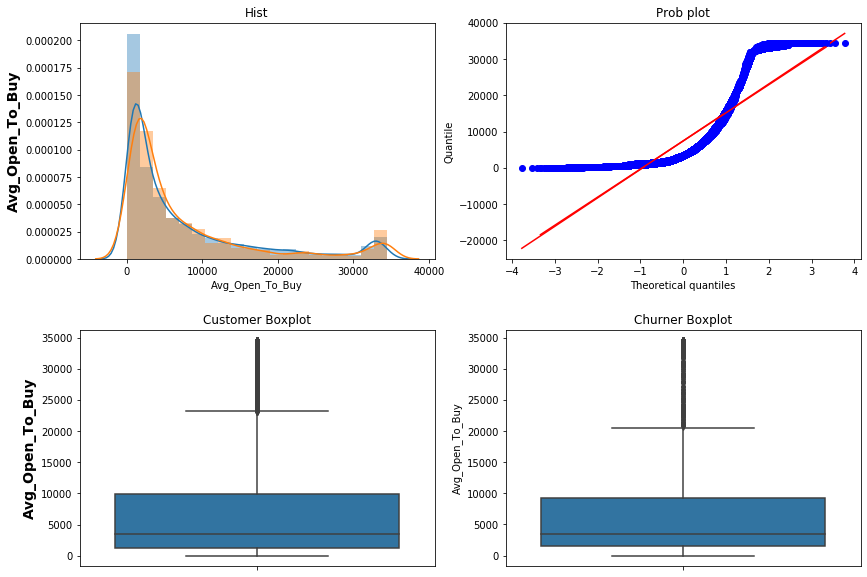





Total_Amt_Chng_Q4_Q1 Skewed Outlier Limit value: 1.2010000000000003


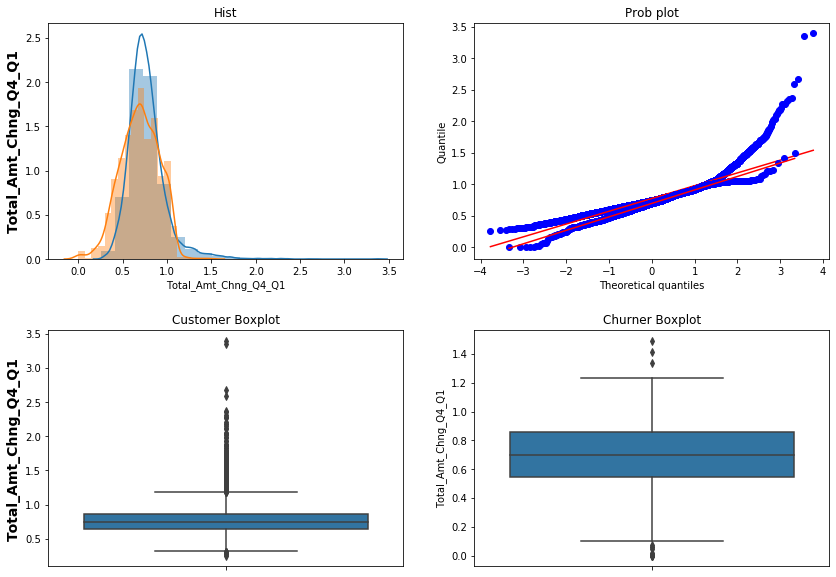





Total_Trans_Amt Skewed Outlier Limit value: 8619.25


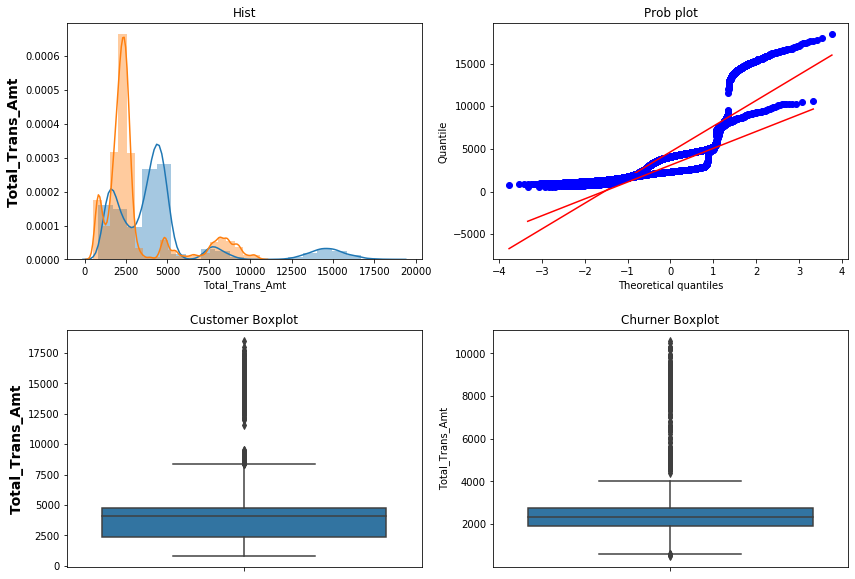





Total_Ct_Chng_Q4_Q1 Skewed Outlier Limit value: 1.1719999999999997


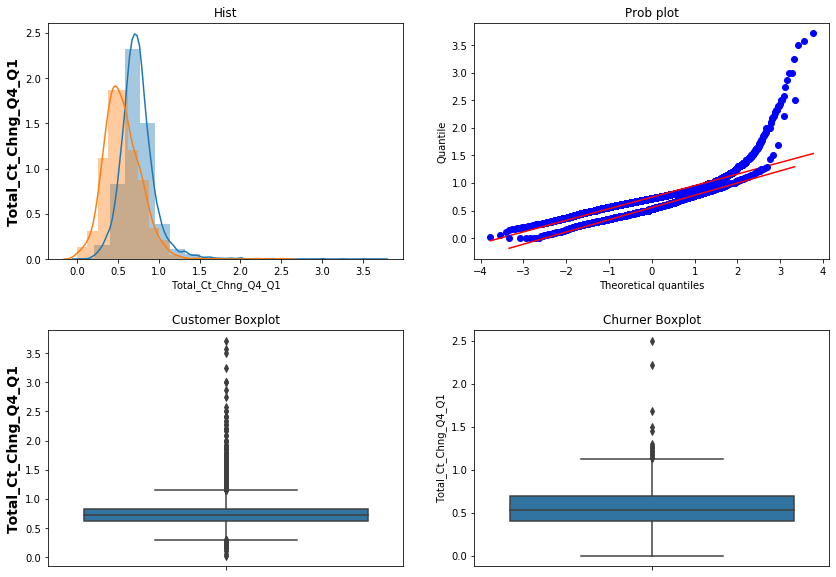

In [25]:
cols = skewed_dist[1:]

i=1

while i <=3:
    for col in cols:
        print(col, 'Skewed Outlier Limit value:', limits[i])
        dist_plots(customer, churner, col)
        print('\n'*3)
        i+=1


         

# Univariate Summary

In [22]:
# Outliers more common in the majority class 

In [23]:
# Credit Limit and Avg_Open_To_Buy are conveying the same information

# Total_Trans_Amt
# Total_Amt_Chng_Q4_Q1 

# Need to investigate these skewed distributions in relation to the target variable

# Bivariate Analysis 
* Plotting feature-to-feature/feature-to-target dimensions
* Investigating feature-to-target correlation of numeric and categoricals
* Pearsons coeff corr (r, p) for continuous variable 
* Spearmans coeff corr (rs, p) for discrete or heteroskedastic feature-to-feature analysis
* Cohen's Standard: Small:0.10-0.29, Medium 0.3-0.49, Large >0.50

In [24]:
sns.pairplot(df.drop('Card_Category', axis=1), hue='Attrition_Flag', kind='reg')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbc8365def0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Plotting correlation between features cols and the target variable 
corr_df = pd.DataFrame(columns = ['r', 'p'])


for col in df.select_dtypes('float'):
    if col != 'Attrition_Flag':
        r, p = pearsonr(df[col],(df['Attrition_Flag']))
        corr_df.loc[col] = [round(r, 5), round(p, 5)]
    
corr_df

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot(x=corr_df.index, y=corr_df['r'], ax=ax[0])
ax[0].set_xticklabels(labels=corr_df.index, rotation=60, ha='right', minor=False)
ax[0].set_title('Pearson r Value')
ax[0].axhline(.15, ls = '--')
ax[0].axhline(0, ls = '-')

ax[0].axhline(-.15, ls = '--')

sns.barplot(x=corr_df.index, y=corr_df['p'], ax=ax[1])
ax[1].set_xticklabels(labels=corr_df.index, rotation=60, ha='right', minor=False)
ax[1].set_title('Pearson p Value')
plt.show()

In [ ]:
scorr_df = pd.DataFrame(columns = ['rs', 'p'])

for col in df.select_dtypes('int'):
    if col != 'Attrition_Flag':
        rs, p = spearmanr(df[col], df['Attrition_Flag'])
        scorr_df.loc[col] = [round(rs,5), round(p,5)]
        
scorr_df

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot(x=scorr_df.index, y=scorr_df['rs'], ax=ax[0])
ax[0].set_xticklabels(labels=scorr_df.index, rotation=60, ha='right', minor=False)
ax[0].set_title('rs In Relation To Target')
ax[0].axhline(.15, ls = '--')
ax[0].axhline(0, ls = '-')
ax[0].axhline(-.15, ls = '--')

sns.barplot(x=scorr_df.index, y=scorr_df['p'], ax=ax[1])
ax[1].set_xticklabels(labels=scorr_df.index, rotation=60, ha='right', minor=False)
ax[1].set_title('p In Relation To r')
plt.show()

In [ ]:
df.to_csv('data/BankChurn_le.csv', index = False)

# Take aways
Overall there is modest linear feature-to-feature and feature-to-target correlation pearson r: 0.1 to 0.2, spearman r: 0.1 to 0.4. However visualizing feature-to-feature/feature-to-target with pairplot indicates that a linear model would perform poorly as many some columns suffer from low kurtosis and are spread with instances of both classes overlap across the slope of the regline. Beyond this there are also many outlier instances of the majority class which are clustered at higher values than the minority/target class. Given the number of features this volume of outliers lends itself better to a bayesian, ensembvle, or tree model.

## Notes 
* Overall modest feature-to-feature and feature-to-target correlation - though high skew and high/low kurtosis limits the potential for linear model (maybe SVM). Bayian probablilty or more likely (high no. of features) decision tree models are best suited to this task
* Outlier density across several features highlights class imbalance - will test under/oversampling techniques
* Will follow up sampling techniques with Decision Tree, ensemble, and stacking classifer evaluations
* Some columns in the data will need to scaled

## Columns with the most potential
Columns with modest feature-to-target corr and tight clusters of majority class at higher values than minority class

* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon
* Total_Revolving_Bal
* Total_Trans_Amt
* Total_Trans_Ct
* Total_Ct_Chng_Q4_Q1
* Avg_Utilization_Ratio


## Columns to consider dropping
Columng that convey the same/similar information
* Months_On_Book - Customer_Age
* Credit_Limit - Avg_Open_To_Buy 
* Total_Amt_Chng_Q4_Q1 - Total_ct_Chng_Q4_Q1 


## Columns that display linear heteroscedasticity
* Total_Trans_Amt - Total_Trans_Ct 
* Total_Amt_Chng_Q4_Q1 - Total_Ct_Chng_Q4_Q1 
